In [3]:
# Logistic regression
import torch
import matplotlib.pyplot as plt

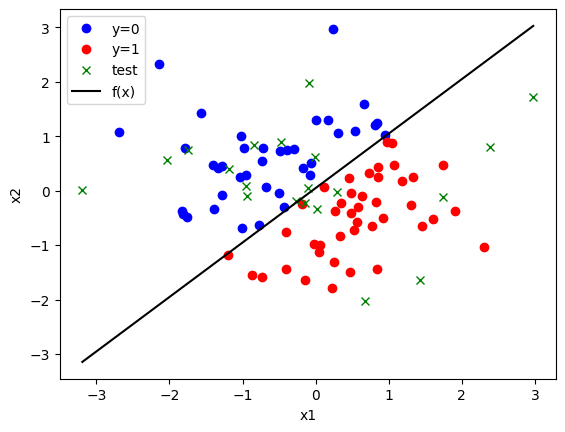

In [8]:
# Create a simple dataset
n_data = 100
n_train = 80
X = torch.randn(n_data,2)
def f(input):
    return (input[0]- X[:,0].median()) - (input[1] - X[:,1].median())
y = torch.tensor([1 if f(x_row) > 0 else 0 for x_row in X])

# Split data for training and testing
idx = torch.randperm(n_data)
X_train = X[idx[:n_train]]
X_test = X[idx[n_train:]]
y_train = y[idx[:n_train]]
y_test = y[idx[n_train:]]

# plot the data with different marker
x1_plot = torch.linspace(X[:,0].min(), X[:,0].max(), 100)
x2_plot = x1_plot - (X[:,0].median() - X[:,1].median())

X_train_label0 = X_train[y_train==0]
X_train_label1 = X_train[y_train==1]
plt.plot(X_train_label0[:,0], X_train_label0[:,1], c='b', marker='o', linestyle='None', label='y=0')
plt.plot(X_train_label1[:,0], X_train_label1[:,1], c='r', marker='o', linestyle='None', label='y=1')
plt.plot(X_test[:,0], X_test[:,1], c='g', marker='x', linestyle='None', label='test')
plt.plot(x1_plot, x2_plot, c='k', label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

epoch: 0, loss: 0.7290898561477661
epoch: 10, loss: 0.6214558482170105
epoch: 20, loss: 0.5466861724853516
epoch: 30, loss: 0.4932178854942322
epoch: 40, loss: 0.45351308584213257
epoch: 50, loss: 0.4229523241519928
epoch: 60, loss: 0.3986894488334656
epoch: 70, loss: 0.37891885638237
epoch: 80, loss: 0.3624541461467743
epoch: 90, loss: 0.34848934412002563
test loss: 0.3646942973136902


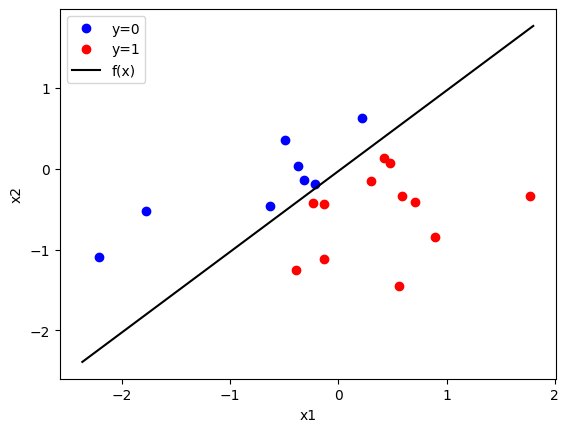

In [26]:
# Create logistic regression model
class LogisticRegression(torch.nn.Module):
    def __init__(self):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(2, 1)
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Create a model, loss function and optimizer
model = LogisticRegression()
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# Train the model
for epoch in range(100):
    y = model(X_train)
    loss = criterion(y, y_train.view(-1,1).float())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print('epoch: {}, loss: {}'.format(epoch, loss.item()))

# Test the model
y_test_pred = model(X_test)

# Print the test loss and plot the data
test_loss = criterion(y_test_pred, y_test.view(-1,1).float())
print('test loss: {}'.format(test_loss.item()))
X_test_label0 = X_test[y_test==0]
X_test_label1 = X_test[y_test==1]
plt.plot(X_test_label0[:,0], X_test_label0[:,1], c='b', marker='o', linestyle='None', label='y=0')
plt.plot(X_test_label1[:,0], X_test_label1[:,1], c='r', marker='o', linestyle='None', label='y=1')
plt.plot(x1_plot, x2_plot, c='k', label='f(x)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()